## Twitter Sentiment Analysis Project

#### Import Dependencies

In [40]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings("ignore")

In [3]:
import nltk

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Prabhakar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Load the Dataset

In [5]:
df=pd.read_csv(r"C:\Users\Prabhakar\OneDrive\Desktop\Data Analytics\AI1094\twitter_training.csv")

#### Visualising the first 5 rows of the dataset

In [6]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


#### Visualising the last 5 rows of the dataset

In [7]:
df.tail()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...
74680,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


#### Here we can see that the 1st row of the dataset has been shown as the column name, hence we have to change that

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [9]:
df.shape

(74681, 4)

#### Here we can see that there are 74681 rows and 4 columns

#### Entering the names of the column

In [10]:
column_names=['Tweet_ID','Entity','Sentiment','Tweet_Content']

In [11]:
df=pd.read_csv(r"C:\Users\Prabhakar\OneDrive\Desktop\Data Analytics\AI1094\twitter_training.csv",names=column_names)

#### Now we can see that the column names have been specified

In [12]:
df.head()

,Tweet_ID,Entity,Sentiment,Tweet_Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


#### Since we have entered the column names, 1 row has been increased

In [13]:
df.shape

(74682, 4)

### Data Preprocessing and Cleaning

In [14]:
df.isnull().sum()

Tweet_ID           0
Entity             0
Sentiment          0
Tweet_Content    686
dtype: int64

#### we can see that there are 686 null values present in tweet_content column, hence we have to drop that.

In [15]:
df.dropna(inplace=True)

In [16]:
df.isna().sum()

Tweet_ID         0
Entity           0
Sentiment        0
Tweet_Content    0
dtype: int64

In [17]:
df.duplicated().sum()

2340

#### We can see that there are 2340 duplicated values, hence we have to drop that

In [18]:
df.drop_duplicates(inplace=True)

#### After removing all null and duplicated values, we need to reset the indexes.

In [19]:
df.reset_index(inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71656 entries, 0 to 71655
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          71656 non-null  int64 
 1   Tweet_ID       71656 non-null  int64 
 2   Entity         71656 non-null  object
 3   Sentiment      71656 non-null  object
 4   Tweet_Content  71656 non-null  object
dtypes: int64(2), object(3)
memory usage: 2.7+ MB


In [21]:
df['Sentiment'].value_counts()

Sentiment
Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

In [22]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [23]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

#### here we differentiated all the words which has less meaning in the sentences

In [24]:
def preprocess_text(text):
    #removing the punctuation, numbers and special characters
    text = re.sub(r'[^a-zA-Z\s]', '',text)
    
    #Convert to lowercase
    text = text.lower()
    #Tokenize the text
    tokens = text.split()
    
    #Remove the stop words do stemming
    tokens =  [stemmer.stem(word) for word in tokens if word not in stop_words]
    return  ' '.join(tokens)

In [25]:
df['preprocessed_text']=df['Tweet_Content'].apply(preprocess_text)
print(df[['Tweet_Content','preprocessed_text']].head())

                                       Tweet_Content  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

           preprocessed_text  
0   im get borderland murder  
1           come border kill  
2     im get borderland kill  
3  im come borderland murder  
4   im get borderland murder  


#### we made a new column named preprocessed text where we have all the words which are important without punctuations, special symbols and characters as well as numbers.

In [26]:
df.head()

,index,Tweet_ID,Entity,Sentiment,Tweet_Content,preprocessed_text
0,0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im get borderland murder
1,1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,come border kill
2,2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im get borderland kill
3,3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im come borderland murder
4,4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im get borderland murder


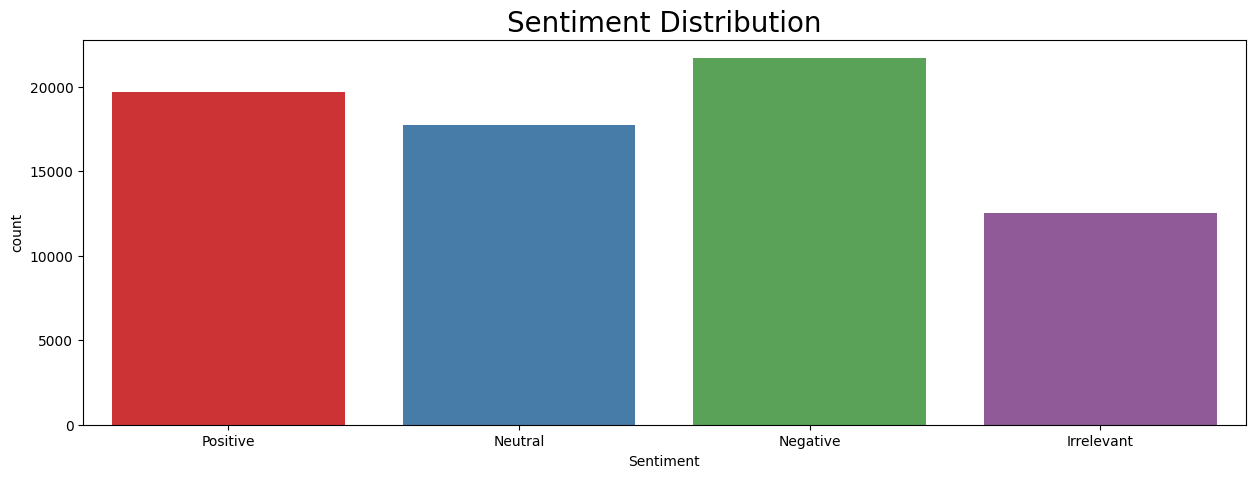

In [27]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Sentiment",data = df,palette="Set1")
plt.title("Sentiment Distribution",fontsize=20)
plt.show()

#### Here we can observe that negative sentiments are the highest than others.

In [28]:
X=df['preprocessed_text']
y=df['Sentiment']

#### we are separating the input and the target as X and y for train test split

In [29]:
train_texts, test_texts, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_texts)
X_test = vectorizer.transform(test_texts)

#### CountVectorizer is a tool in Natural Language Processing (NLP) that converts text data into numerical vectors.

In [31]:
label_encoder = LabelEncoder()
y_train_le = label_encoder.fit_transform(train_labels)
y_test_le = label_encoder.transform(test_labels)

#### LabelEncoder is used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.

In [32]:
y_train = to_categorical(y_train_le)
y_test = to_categorical(y_test_le)

#### The purpose of converting the integer labels to a binary matrix is to enable the use of categorical cross-entropy loss function, which is commonly used in multi-class classification problems

In [33]:
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(label_encoder.classes_), activation='softmax')
])

#### Here Sequential neural network model is created and the model consists of three fully connected (Dense) layers.¶
#### * The first layer has 128 neurons with a rectified linear unit (ReLU) activation function and takes the input with a shape of (X_train.shape[1],), which is the number of features in the training data.
#### * The second layer also has a ReLU activation function and 64 neurons.
#### * The third and final layer is the output layer, which has a number of neurons equal to the number of unique classes in the dataset and softmax activation function is used for multi-class classification problems.

In [34]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

#### The optimizer sets the optimization algorithm to Adam, which is a popular choice due to its efficiency and effectiveness. The loss function to categorical cross-entropy, which is commonly used for multi-class classification problems.The metrics sets the metric to be evaluated during training and testing to accuracy, which is the proportion of correct predictions out of all predictions made

In [35]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test , y_test))

Epoch 1/10
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 109s 58ms/step - accuracy: 0.6122 - loss: 0.9486 - val_accuracy: 0.8436 - val_loss: 0.4158
Epoch 2/10
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 106s 59ms/step - accuracy: 0.9139 - loss: 0.2350 - val_accuracy: 0.8894 - val_loss: 0.2998
Epoch 3/10
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 106s 59ms/step - accuracy: 0.9561 - loss: 0.1127 - val_accuracy: 0.8937 - val_loss: 0.3199
Epoch 4/10
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 108s 60ms/step - accuracy: 0.9654 - loss: 0.0826 - val_accuracy: 0.8967 - val_loss: 0.3414
Epoch 5/10
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 107s 59ms/step - accuracy: 0.9676 - loss: 0.0739 - val_accuracy: 0.8951 - val_loss: 0.3745
Epoch 6/10
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 106s 59ms/step - accuracy: 0.9701 - loss: 0.0683 - val_accuracy: 0.8921 - val_loss: 0.4017
Epoch 7/10
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 107s 60ms/step - accuracy: 0.9712 - loss: 0.0626 - val_accuracy: 0.8942 - val_loss: 0.4062
Epoch 8/10
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 108s 60ms/step - accuracy: 

#### Here we can observe that the accuracy started from 61% and went up till 97% which means that the model performs with good accuracy as well as the loss was reduced from 94% to 5%

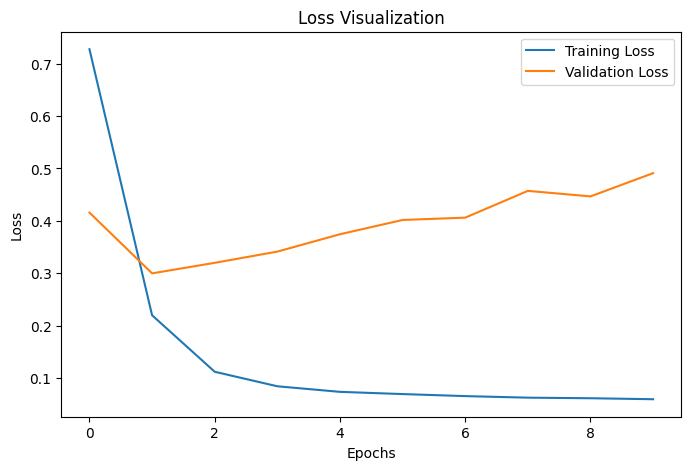

In [36]:
plt.figure(figsize=(8, 5))
plt.plot(model.history.history["loss"], label="Training Loss")
plt.plot(model.history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss Visualization")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

#### We can observe that the training loss has been drastically reduced and at a certain point it became stable.

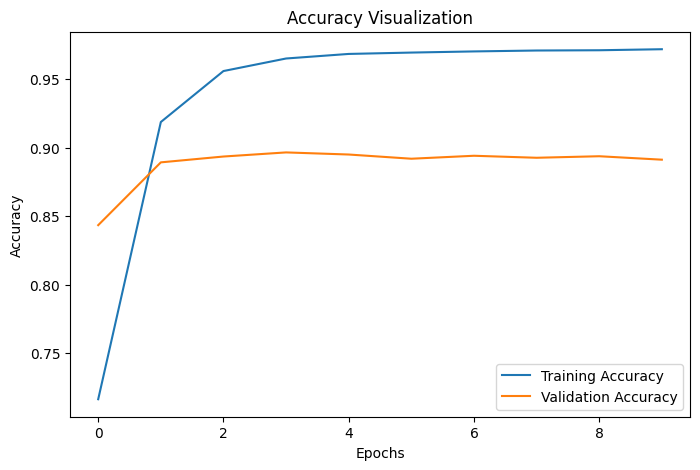

In [37]:
plt.figure(figsize=(8, 5))
plt.plot(model.history.history["accuracy"], label="Training Accuracy")
plt.plot(model.history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy Visualization")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

#### the training accuracy has been increased drasticaLLY, and at a point it became stable.

#### Building a function to check whether the model is predicting correct results or not.

In [41]:
def predict_sentiment(input_text):
   
    input_text = [input_text] 
    input_vector = vectorizer.transform(input_text)  

    input_tensor = tf.convert_to_tensor(input_vector.toarray(), dtype=tf.float32)  
  
    predictions = model.predict(input_tensor)  

    predicted_label_index = np.argmax(predictions) 
    predicted_sentiment = label_encoder.classes_[predicted_label_index]  

    return predicted_sentiment

In [42]:
input_text1 = "im getting on borderlands and i will murder you all ,"
predicted_sentiment = predict_sentiment(input_text1)
print(f"The predicted sentiment for '{input_text1}' is: {predicted_sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
The predicted sentiment for 'im getting on borderlands and i will murder you all ,' is: Positive


#### here we gave the input from the dataset and for which we got the correct prediction, After preprocessing and cleaning , we can say that the model is performing with good accuracy and with small loss value.